# Logistic Regression

It is a classificaltion algorithm

Sigmoid function transforms a linear line into a curve which has values between 0 and 1. The reason we choose a sigmoid function to model classification problems solved with logistic regression is that we want to make sure that predicted value has a defined range which helps in differentiating the classes.




In [1]:
#importing libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error as mse

In [3]:
data = pd.read_csv('data_cleaned.csv')
data.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


In [4]:
# Segregating data in independent and dependent variables

X = data.drop(['Survived'], axis=1)
y = data['Survived']

data.shape, X.shape, y.shape

((891, 25), (891, 24), (891,))

In [5]:
# Creating Train Test split

from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=122)

In [9]:
# SciKit requires all the data to be normalized. So, lets normalize the data such as Age, Fare using Max_Min_Scalar

from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler()

cols = train_X.columns
cols

Index(['Age', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female',
       'Sex_male', 'SibSp_0', 'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4',
       'SibSp_5', 'SibSp_8', 'Parch_0', 'Parch_1', 'Parch_2', 'Parch_3',
       'Parch_4', 'Parch_5', 'Parch_6', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [17]:
#applying MinMaxScalar to Train data

train_X_scales = scalar.fit_transform(train_X)

#This converts data into array. We need to convert it back to DataFrame
train_X_scales

array([[0.39792223, 0.06441171, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.11660777, 0.03103473, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.40201142, 0.01571255, 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.51073661, 0.29953885, 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.32046752, 0.03259623, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.39792223, 0.02822072, 0.        , ..., 1.        , 0.        ,
        0.        ]])

In [19]:
#convert above array into DataFrame
train_X_scaled = pd.DataFrame(train_X_scales, columns=cols)
train_X_scaled.head()

#you can see that Age and Fare are normalized now.

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0.397922,0.064412,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.116608,0.031035,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.402011,0.015713,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.252514,0.015412,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.252514,0.015412,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [22]:
#Scale Test_X as well

test_X_scales = scalar.fit_transform(test_X)
test_X_scaled = pd.DataFrame(test_X_scales, columns=cols)
test_X_scaled.head()

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0.432177,0.175668,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.444795,0.025374,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.406940,0.016892,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.444795,0.015412,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.217666,0.015176,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Implementing Logistic Regression

In [107]:
from sklearn.linear_model import LogisticRegression as LOR
from sklearn.metrics import f1_score

In [27]:
lor = LOR()

lor.fit(train_X_scaled, train_y)

LogisticRegression()

In [29]:
#f1_score for training data

predicted_train = lor.predict(train_X_scaled)
f1_train = f1_score(predicted_train, train_y)
f1_train

0.7549407114624506

In [30]:
# f1_score for Test Data

predicted_test = lor.predict(test_X_scaled)
f1_test = f1_score(predicted_test, test_y)
f1_test

0.6710526315789473

In [33]:
# Here, we are using predict which is only outputting 1 and 0s. It dosen't show probabilities. To predict probabilities, we need to use 'predict_proba'
predicted_test

array([1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0], dtype=int64)

## Making predictions using *predict_proba* function

In [81]:
# Predicting over train

train_predict_proba = lor.predict_proba(train_X_scaled)
train_predict_proba

array([[0.22736899, 0.77263101],
       [0.79954294, 0.20045706],
       [0.92237078, 0.07762922],
       ...,
       [0.59613503, 0.40386497],
       [0.42706317, 0.57293683],
       [0.88441223, 0.11558777]])

In [82]:
#Here, we get two values, prediction for both the classes. For further calculations, we need a list of only 1 probability for calculation

train_preds = train_predict_proba[:,1]
train_preds

array([0.77263101, 0.20045706, 0.07762922, 0.10852716, 0.10852716,
       0.45666153, 0.0560048 , 0.27910277, 0.10613587, 0.04840931,
       0.1589273 , 0.81393042, 0.94735232, 0.9549599 , 0.11181158,
       0.79391655, 0.70376561, 0.07773548, 0.11532625, 0.30886784,
       0.19804785, 0.81090992, 0.91324932, 0.0595141 , 0.11522465,
       0.60972385, 0.12205393, 0.07632641, 0.2472108 , 0.06046812,
       0.07835104, 0.61610097, 0.1443882 , 0.45108948, 0.1022025 ,
       0.31518987, 0.07240355, 0.803245  , 0.9419146 , 0.09982656,
       0.14169387, 0.33166977, 0.9209013 , 0.30007103, 0.07835104,
       0.05674924, 0.14666468, 0.71764499, 0.52146383, 0.19789295,
       0.0904971 , 0.52065357, 0.07122419, 0.1085226 , 0.64070427,
       0.14123268, 0.22870833, 0.76711829, 0.13718442, 0.53791713,
       0.07835539, 0.22605419, 0.90791603, 0.55211214, 0.09769595,
       0.25698804, 0.08779852, 0.10220698, 0.86557848, 0.09921343,
       0.10452378, 0.09329778, 0.4734199 , 0.09913586, 0.13454

In [83]:
for i in range(0, len(train_preds)):
  if(train_preds[i]>0.55):
    train_preds[i] = 1
  else:
    train_preds[i] = 0
  


In [84]:
# Calculating f1-score
k = f1_score(train_preds, train_y)
print('Training f1_score', k )

Training f1_score 0.7622950819672131


## Confusion Metrix

In [88]:
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(test_y, predicted_test)
cf

array([[122,  21],
       [ 29,  51]], dtype=int64)

In [89]:
from sklearn.metrics import classification_report

print(classification_report(test_y, predicted_test))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       143
           1       0.71      0.64      0.67        80

    accuracy                           0.78       223
   macro avg       0.76      0.75      0.75       223
weighted avg       0.77      0.78      0.77       223



In [99]:
## Parameters of Logistic Regression
lor.coef_.reshape(-1)



array([-2.4695389 ,  0.19991831,  1.10298873, -0.01424493, -1.08877643,
        1.30191617, -1.30194881,  0.55867294,  0.83674692,  0.52900402,
       -0.56711212, -0.44596559, -0.53793565, -0.37344314,  0.26114599,
        0.36675663,  0.22137674,  0.07398102, -0.7117784 , -0.21151461,
        0.        ,  0.17360051,  0.0802776 , -0.25391074])

In [96]:
lor.coef_

array([[-2.4695389 ,  0.19991831,  1.10298873, -0.01424493, -1.08877643,
         1.30191617, -1.30194881,  0.55867294,  0.83674692,  0.52900402,
        -0.56711212, -0.44596559, -0.53793565, -0.37344314,  0.26114599,
         0.36675663,  0.22137674,  0.07398102, -0.7117784 , -0.21151461,
         0.        ,  0.17360051,  0.0802776 , -0.25391074]])

Text(0.5, 1.0, 'Coefficient plot')

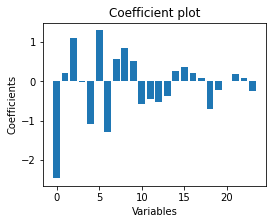

In [94]:
### Plotting the coefficients

plt.figure(figsize=(4, 3), facecolor='w', edgecolor='b')
x = range(len(train_X_scaled.columns))
c = lor.coef_.reshape(-1)
plt.bar( x, c )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Coefficient plot')

In [101]:
Coefficients = pd.DataFrame({
    'Variable'    : train_X.columns,
    'coefficient' : abs(c)
})
Coefficients.head()

,Variable,coefficient
0,Age,2.469539
1,Fare,0.199918
2,Pclass_1,1.102989
3,Pclass_2,0.014245
4,Pclass_3,1.088776


In [103]:
#selecting variables with high coefficient
sig_var = Coefficients[Coefficients.coefficient > 0.3]
sig_var

,Variable,coefficient
0,Age,2.469539
2,Pclass_1,1.102989
4,Pclass_3,1.088776
5,Sex_female,1.301916
6,Sex_male,1.301949
7,SibSp_0,0.558673
8,SibSp_1,0.836747
9,SibSp_2,0.529004
10,SibSp_3,0.567112
11,SibSp_4,0.445966


In [104]:
subset = data[sig_var['Variable'].values]
subset.head()

,Age,Pclass_1,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_1,Parch_4
0,22.0,0,1,0,1,0,1,0,0,0,0,0,0,0
1,38.0,1,0,1,0,0,1,0,0,0,0,0,0,0
2,26.0,0,1,1,0,1,0,0,0,0,0,0,0,0
3,35.0,1,0,1,0,0,1,0,0,0,0,0,0,0
4,35.0,0,1,0,1,1,0,0,0,0,0,0,0,0


In [122]:
subset.shape, y.shape

((891, 14), (891,))

In [117]:
# Using train test split function
train_x1,test_x1,train_y1,test_y1 = train_test_split(subset, y, random_state = 56)

In [126]:
colcol = train_x1.columns
colcol

Index(['Age', 'Pclass_1', 'Pclass_3', 'Sex_female', 'Sex_male', 'SibSp_0',
       'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4', 'SibSp_5', 'SibSp_8',
       'Parch_1', 'Parch_4'],
      dtype='object')

In [124]:
#applying MinMaxScalar to Train data

train_X_scales = scalar.fit_transform(train_x1)

#This converts data into array. We need to convert it back to DataFrame
train_X_scales

array([[0.37170143, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.33400352, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.39683338, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.34656949, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.30887158, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.19577783, 1.        , 0.        , ..., 0.        , 1.        ,
        0.        ]])

In [127]:
#convert above array into DataFrame
train_X_scaled = pd.DataFrame(train_X_scales, columns=colcol)
train_X_scaled.head()

#you can see that Age and Fare are normalized now.

,Age,Pclass_1,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_1,Parch_4
0,0.371701,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.334004,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.396833,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.786378,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.334004,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [128]:
# Creating instance of Logistic Regresssion
lor1 = LOR()

# Fitting the model
lor1.fit(train_X_scaled, train_y1)

LogisticRegression()

Making predictions using predict function


In [137]:
# Predicting over the Train
train_predict = lor1.predict(train_X_scaled)
k = f1_score(train_predict, train_y1)
print('Training f1_score', k )

Training f1_score 0.7430830039525693


Text(0.5, 1.0, 'Coefficient plot')

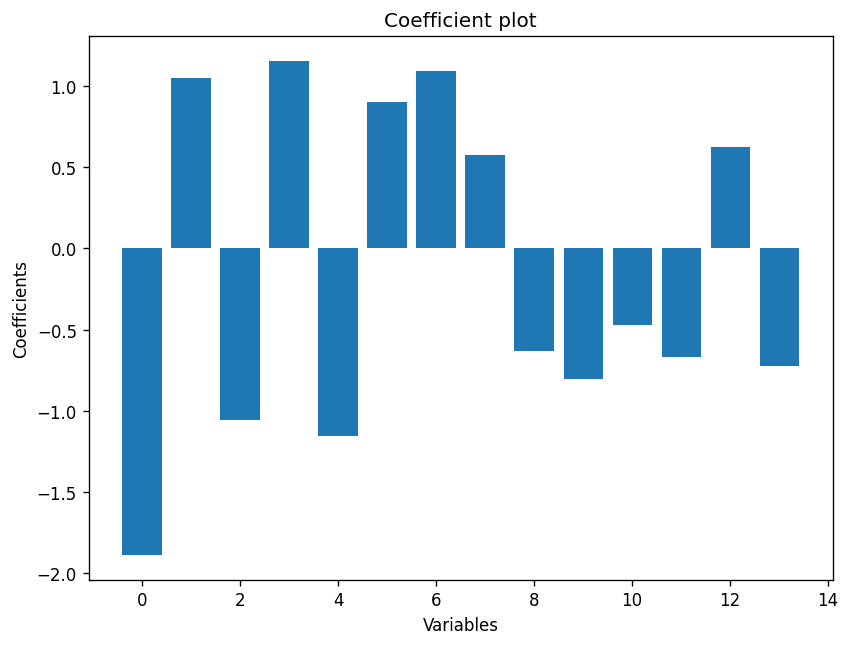

In [138]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_X_scaled.columns))
c = lor1.coef_.reshape(-1)
plt.bar( x, c )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Coefficient plot')